Actividad semanal 9 : Ciencia y analítica de datos

Equipo 143:

Carlos Emmanuel González - A01793488

Enrique Ricardo García Hernández - A01315428

Profesora: María de la Paz Rico Fernández

Fecha: Nov 18 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Lectura del archivo de aguas superficiales
df = pd.read_csv('/content/sample_data/Aguas_subterraneas.csv', sep = ',', encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [103]:
df.shape

(1068, 57)

In [3]:
df.drop(['SITIO','ORGANISMO_DE_CUENCA'],axis=1).describe(include="all")

,CLAVE,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,...,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,32,452,273,8,NaN,NaN,NaN,NaN,4,...,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,121,27,119,1039,NaN,NaN,NaN,NaN,794,...,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Algunas variables de naturaleza numérica actualmente están configuradas como "string", eso se debe a que para algunos valores, se usó estructura de intrevalo, por ejemplo "PB_TOT_mg/L<0.0015"
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [106]:
#Pasar de variables str/object a float
var_tipo_num=['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for var in var_tipo_num:
  print(df[var].value_counts())

157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
Series([], Name: SDT_mg/L, dtype: int64)
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64
<20        26
121.512     6
53.8542     4
109.56      4
428.27      3
           ..
51.454      1
103         1
24.8725     1
71.6184     1
362.544     1
Name: DUR_mg/L, Length: 889, dtype: int64
<1.1    73

In [5]:
#Las variables cuyo valor está representado como un intervalo (ejemplo: FLUORUROS_mg/L<'0.2) serán tratados como valores_nulos
var_tipo_num=['SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for var in var_tipo_num:
  df[var]=pd.to_numeric(df[var],errors='coerce')
  print('El valor promedio de la variable',var,'es',round(df[var].mean(),2))
  print('El número de observaciones nulas de la variable',var,'es',df[var].isnull().sum())

El valor promedio de la variable SDT_mg/L es nan
El número de observaciones nulas de la variable SDT_mg/L es 1068
El valor promedio de la variable SDT_M_mg/L es 896.92
El número de observaciones nulas de la variable SDT_M_mg/L es 3
El valor promedio de la variable FLUORUROS_mg/L es 1.23
El número de observaciones nulas de la variable FLUORUROS_mg/L es 162
El valor promedio de la variable DUR_mg/L es 356.13
El número de observaciones nulas de la variable DUR_mg/L es 27
El valor promedio de la variable COLI_FEC_NMP/100_mL es 1144.57
El número de observaciones nulas de la variable COLI_FEC_NMP/100_mL es 737
El valor promedio de la variable N_NO3_mg/L es 4.6
El número de observaciones nulas de la variable N_NO3_mg/L es 66
El valor promedio de la variable AS_TOT_mg/L es 0.05
El número de observaciones nulas de la variable AS_TOT_mg/L es 815
El valor promedio de la variable CD_TOT_mg/L es 0.02
El número de observaciones nulas de la variable CD_TOT_mg/L es 1066
El valor promedio de la variabl

In [6]:
#La variables SDT_mg/L es NULL en todos los registros ==> Eliminaremos dicha variable así como su equivalencia
df=df.drop(['SDT_mg/L','CALIDAD_SDT_ra'],axis=1)
df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI



Catálogo de conversión de variables numéricas que algún dato se capturó como intervalo

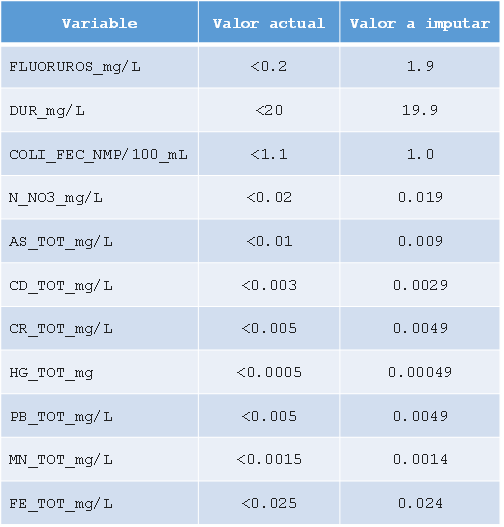

In [7]:
paso=df.copy() #Copia de resguardo!!!

In [8]:
#Las variables cuyo valor está representado como un intervalo (ejemplo: FLUORUROS_mg/L<'0.2) serán tratados como valores_nulos

#Diccionario de variable y valor a imputar
variables={'FLUORUROS_mg/L':1.9,'DUR_mg/L':19,'COLI_FEC_NMP/100_mL':1.0,'N_NO3_mg/L':0.019,'AS_TOT_mg/L':0.009,'CD_TOT_mg/L':0.0029,'CR_TOT_mg/L':0.0049,'HG_TOT_mg/L':0.00049,'PB_TOT_mg/L':0.0049,'MN_TOT_mg/L':0.0014,'FE_TOT_mg/L':0.024}

for m,n in variables.items():
  df[m].fillna(n,inplace=True)

In [111]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,1065.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000,1068.000000
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,896.919502,1.333465,347.605734,355.421348,4.315671,0.018855,0.002930,0.013196,0.000548,0.005184,0.072427,0.410012
std,6.703263,3.887670,0.0,116.874291,1245.563674,2752.693639,1.903438,359.663979,2052.468941,8.342292,0.035420,0.000898,0.154396,0.000468,0.003263,0.376522,5.538000
min,-116.664250,14.561150,2020.0,26.640000,50.400000,101.200000,0.200800,19.000000,1.000000,0.019000,0.009000,0.002900,0.004900,0.000490,0.004900,0.001400,0.024000
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,337.800000,0.396225,120.956900,1.000000,0.646229,0.009000,0.002900,0.004900,0.000490,0.004900,0.001400,0.024000
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,550.800000,0.798250,245.175900,1.000000,2.080766,0.009000,0.002900,0.004900,0.000490,0.004900,0.001400,0.046960
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,916.200000,1.900000,453.930000,13.250000,5.200047,0.009000,0.002900,0.004900,0.000490,0.004900,0.009947,0.173380
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.032110,5.003200,0.014150,0.080900,8.982000,178.615000


In [9]:
var_tipo_num=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
for n in var_tipo_num:
  print("Estadísticos descriptivos de",n)
  print(df[n].describe())
  print("******************")

Estadísticos descriptivos de ALC_mg/L
count    1064.000000
mean      235.633759
std       116.874291
min        26.640000
25%       164.000000
50%       215.527500
75%       292.710000
max      1650.000000
Name: ALC_mg/L, dtype: float64
******************
Estadísticos descriptivos de CONDUCT_mS/cm
count     1062.000000
mean      1138.953013
std       1245.563674
min         50.400000
25%        501.750000
50%        815.000000
75%       1322.750000
max      18577.000000
Name: CONDUCT_mS/cm, dtype: float64
******************
Estadísticos descriptivos de SDT_M_mg/L
count     1065.000000
mean       896.919502
std       2752.693639
min        101.200000
25%        337.800000
50%        550.800000
75%        916.200000
max      82170.000000
Name: SDT_M_mg/L, dtype: float64
******************
Estadísticos descriptivos de FLUORUROS_mg/L
count    1068.000000
mean        1.333465
std         1.903438
min         0.200800
25%         0.396225
50%         0.798250
75%         1.900000
max        

El valor promedio de ALC_mg/L segmentado por CALIDAD_ALC es el siguiente
CALIDAD_ALC
Alta                    246.54
Baja                     60.81
Indeseable como FAAP    531.65
Media                   118.37
Name: ALC_mg/L, dtype: float64


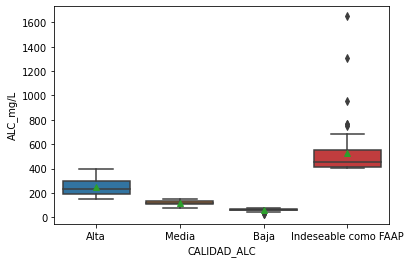

El valor promedio de CONDUCT_mS/cm segmentado por CALIDAD_CONDUC es el siguiente
CALIDAD_CONDUC
Buena para riego          497.46
Dudosa para riego        2466.43
Excelente para riego      192.02
Indeseable para riego    5042.44
Permisible para riego    1196.27
Name: CONDUCT_mS/cm, dtype: float64


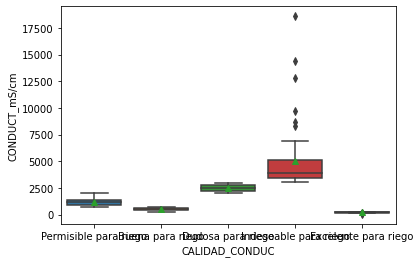

El valor promedio de SDT_M_mg/L segmentado por CALIDAD_SDT_salin es el siguiente
CALIDAD_SDT_salin
Ligeramente salobres     1384.50
Potable - Dulce           486.38
Salinas                 39860.60
Salobres                 3052.68
Name: SDT_M_mg/L, dtype: float64


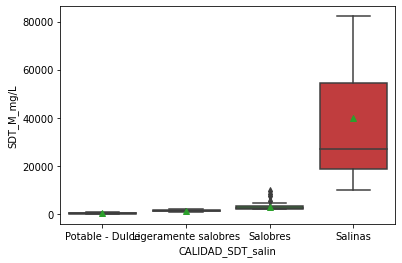

El valor promedio de FLUORUROS_mg/L segmentado por CALIDAD_FLUO es el siguiente
CALIDAD_FLUO
Alta                3.59
Baja                0.89
Media               0.53
Potable - Optima    1.03
Name: FLUORUROS_mg/L, dtype: float64


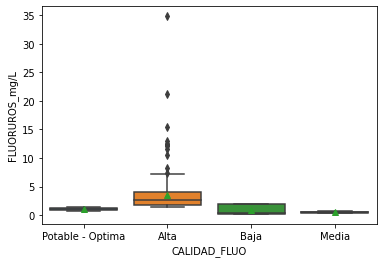

El valor promedio de DUR_mg/L segmentado por CALIDAD_DUR es el siguiente
CALIDAD_DUR
Muy dura e indeseable usos industrial y domestico    864.99
Potable - Dura                                       271.83
Potable - Moderadamente suave                         91.27
Potable - Suave                                       37.02
Name: DUR_mg/L, dtype: float64


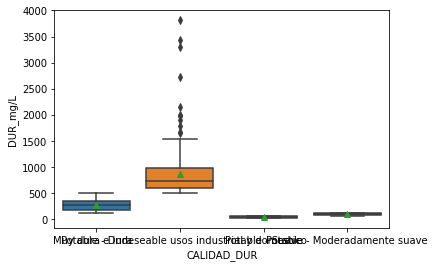

El valor promedio de COLI_FEC_NMP/100_mL segmentado por CALIDAD_COLI_FEC es el siguiente
CALIDAD_COLI_FEC
Aceptable                    406.53
Buena calidad                 47.83
Contaminada                 2699.37
Fuertemente contaminada    17686.50
Potable - Excelente            1.01
Name: COLI_FEC_NMP/100_mL, dtype: float64


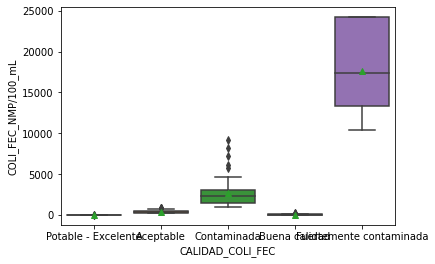

El valor promedio de N_NO3_mg/L segmentado por CALIDAD_N_NO3 es el siguiente
CALIDAD_N_NO3
No apta como FAAP          24.14
Potable - Buena calidad     7.08
Potable - Excelente         1.57
Name: N_NO3_mg/L, dtype: float64


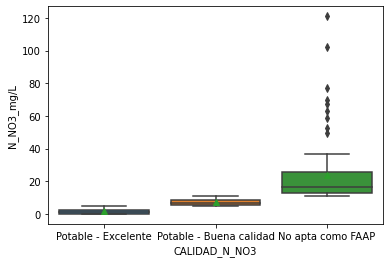

El valor promedio de AS_TOT_mg/L segmentado por CALIDAD_AS es el siguiente
CALIDAD_AS
Apta como FAAP         0.02
No apta como FAAP      0.08
Potable - Excelente    0.01
Name: AS_TOT_mg/L, dtype: float64


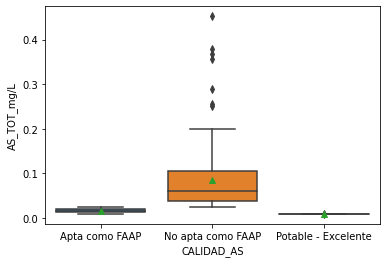

El valor promedio de CD_TOT_mg/L segmentado por CALIDAD_CD es el siguiente
CALIDAD_CD
No apta como FAAP      0.02
Potable - Excelente    0.00
Name: CD_TOT_mg/L, dtype: float64


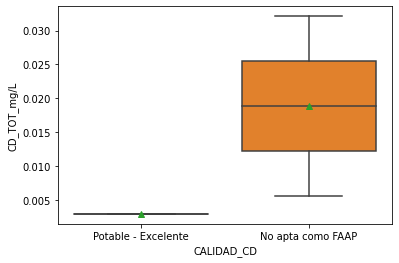

El valor promedio de CR_TOT_mg/L segmentado por CALIDAD_CR es el siguiente
CALIDAD_CR
No apta como FAAP      0.46
Potable - Excelente    0.01
Name: CR_TOT_mg/L, dtype: float64


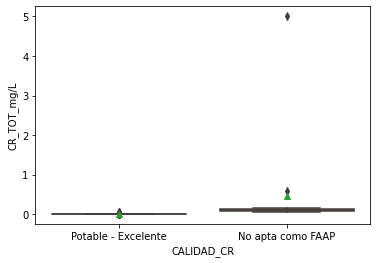

El valor promedio de HG_TOT_mg/L segmentado por CALIDAD_HG es el siguiente
CALIDAD_HG
No apta como FAAP      0.01
Potable - Excelente    0.00
Name: HG_TOT_mg/L, dtype: float64


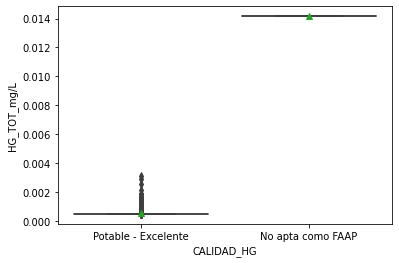

El valor promedio de PB_TOT_mg/L segmentado por CALIDAD_PB es el siguiente
CALIDAD_PB
No apta como FAAP      0.03
Potable - Excelente    0.00
Name: PB_TOT_mg/L, dtype: float64


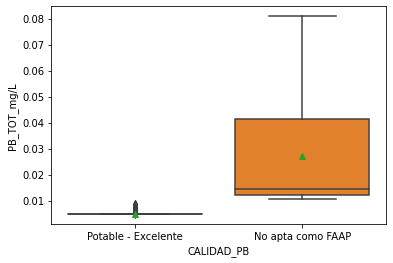

El valor promedio de MN_TOT_mg/L segmentado por CALIDAD_MN es el siguiente
CALIDAD_MN
Potable - Excelente                                  0.01
Puede afectar la salud                               1.20
Sin efectos en la salud - Puede dar color al agua    0.26
Name: MN_TOT_mg/L, dtype: float64


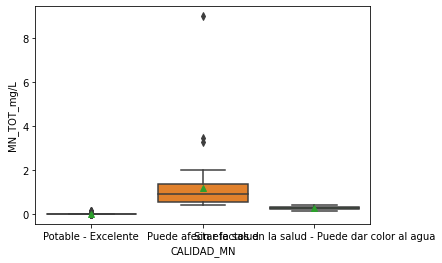

El valor promedio de FE_TOT_mg/L segmentado por CALIDAD_FE es el siguiente
CALIDAD_FE
Potable - Excelente                                  0.07
Sin efectos en la salud - Puede dar color al agua    2.71
Name: FE_TOT_mg/L, dtype: float64


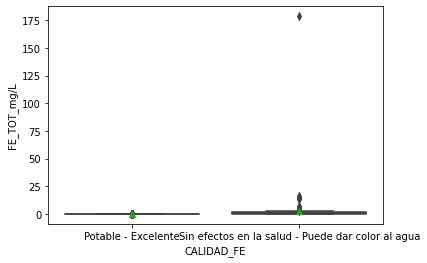

In [10]:
#Boxplot por Variable y Catálogo de calidad de acuerdo al diccionario de equivalencias
#Diccionario de Calidad y Valores
dicc={'ALC_mg/L':'CALIDAD_ALC','CONDUCT_mS/cm':'CALIDAD_CONDUC','SDT_M_mg/L':'CALIDAD_SDT_salin','FLUORUROS_mg/L':'CALIDAD_FLUO','DUR_mg/L':'CALIDAD_DUR','COLI_FEC_NMP/100_mL':'CALIDAD_COLI_FEC','N_NO3_mg/L':'CALIDAD_N_NO3','AS_TOT_mg/L':'CALIDAD_AS','CD_TOT_mg/L':'CALIDAD_CD','CR_TOT_mg/L':'CALIDAD_CR','HG_TOT_mg/L':'CALIDAD_HG','PB_TOT_mg/L':'CALIDAD_PB','MN_TOT_mg/L':'CALIDAD_MN','FE_TOT_mg/L':'CALIDAD_FE',}

for m,n in dicc.items():
  media=df.groupby([n])[m].mean()
  print('El valor promedio de',m,"segmentado por",n,'es el siguiente')
  print(round(media,2))
  sns.boxplot( x=df[n], y=df[m],showmeans=True);
  plt.show()

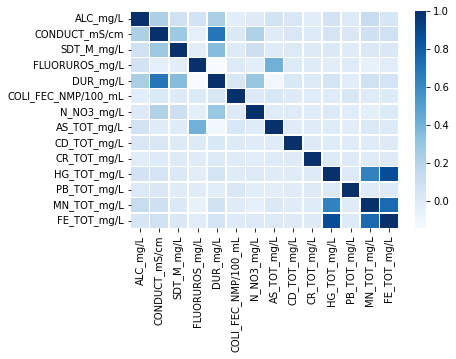

In [11]:
#Matriz de correlación
#Eliminamos variables numéricas como Longitud, Latitud y Periodo
paso=df.drop(['LONGITUD','LATITUD','PERIODO'], axis=1)
matrix = paso.corr() 
sns.heatmap(matrix,linewidth=.5,cmap='Blues')

In [12]:
#Variables cualitativas
var_cual=['SEMAFORO','CONTAMINANTES','CUMPLE_CON_ALC','CUMPLE_CON_COND','CUMPLE_CON_SDT_ra','CUMPLE_CON_SDT_salin','CUMPLE_CON_FLUO','CUMPLE_CON_DUR','CUMPLE_CON_CF','CUMPLE_CON_NO3','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG','CUMPLE_CON_PB','CUMPLE_CON_MN','CUMPLE_CON_FE']
for m in var_cual:
  print(df[m].value_counts())

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64
FLUO,                                            78
DT,                                              65
FLUO,AS,                                         51
CF,                                              31
AS,                                              31
                                                 ..
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,               1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,     1
PB,MN,FE,                                         1
ALC,AS,FE,                                        1
ALC,DT,NO3,                                       1
Name: CONTAMINANTES, Length: 126, dtype: int64
SI    1005
NO      59
ND       4
Name: CUMPLE_CON_ALC, dtype: int64
SI    939
NO    123
ND      6
Name: CUMPLE_CON_COND, dtype: int64
SI    995
NO     71
ND      2
Name: CUMPLE_CON_SDT_ra, dtype: int64
SI    995
NO     71
ND      2
Name: CUMPLE_CON_SDT_salin, dtype: int64
SI    876
NO    192
Name: CUMPL

In [13]:
#Eliminamos aquellas variables en que para las clases minoritarias no alcancemos representatividad < 5%
df.drop(['CONTAMINANTES','CUMPLE_CON_AS','CUMPLE_CON_CD','CUMPLE_CON_CR','CUMPLE_CON_HG'],axis=1)
df.head(5)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [48]:
X = df.loc[:, ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]
Y = df.loc[:, ["SEMAFORO"]]

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

var_num=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L', 'PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

#Imputación de valores missing, para información numérica se utilizará la mediana
#Estandarización de la 
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
        ]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, var_num)
                    ],
                    remainder='passthrough'
)

In [22]:
X_prep = preprocessor.fit_transform(X)

In [23]:
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L',
                                  'FLUORUROS_mg/L', 'DUR_mg/L',
                                  'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L',
                                  'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
                                  'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
                                  'FE_TOT_mg/L'])])

In [25]:
#Generamos los PCA, quedándonos con n-1 variables 
from sklearn.decomposition import PCA
pcs = PCA(n_components=X_prep.shape[1])
pcs.fit(X_prep)

PCA(n_components=14)

In [26]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })

pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,1.6162,1.4393,1.2010,1.0160,1.0134,1.0010,0.9936,0.9729,0.9317,0.8264,0.7665,0.6044,0.5326,0.3235
Proportion of variance,0.1864,0.1478,0.1029,0.0737,0.0733,0.0715,0.0705,0.0675,0.0619,0.0487,0.0419,0.0261,0.0202,0.0075
Cumulative proportion,0.1864,0.3342,0.4372,0.5108,0.5841,0.6556,0.7261,0.7936,0.8556,0.9043,0.9462,0.9723,0.9925,1.0000


In [39]:
#Con 6 componentes, explicamos el 65% de la varianza de la base de datos
#Con 9 componentes principales, explicamos el 85% de la varianza de la base de datos

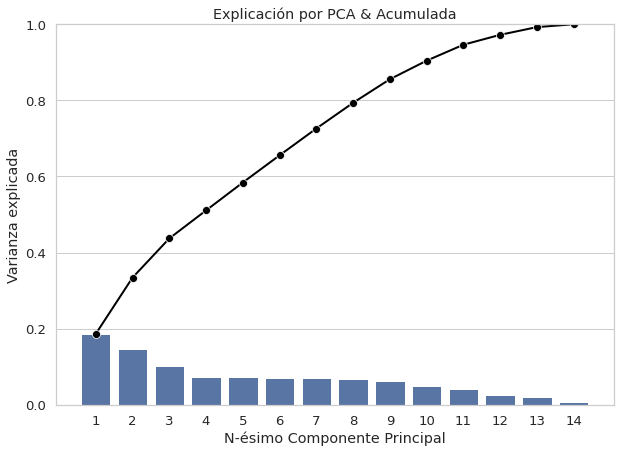

In [27]:
PC_components = np.arange(pcs.n_components_) + 1
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )
fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Explicación por PCA & Acumulada')
plt.xlabel('N-ésimo Componente Principal')
plt.ylabel('Varianza explicada')
plt.ylim(0, 1)
plt.show()

In [28]:
pcsComponents = pd.DataFrame(pcs.components_.transpose(),
                                columns = pcsSummary.columns,
                                 index = X.iloc[:,:].columns
                                )
pcsComponents.iloc[:,:9]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
ALC_mg/L,0.149644,-0.192828,0.268654,0.451559,-0.097674,-0.016429,-0.219691,-0.441027,-0.422422
CONDUCT_mS/cm,0.237977,-0.508901,0.109654,0.030064,0.028951,0.037411,-0.015509,-0.011701,-0.029367
SDT_M_mg/L,0.126280,-0.350934,0.067151,-0.036691,-0.029118,0.041797,-0.009798,-0.026501,0.785340
FLUORUROS_mg/L,-0.058373,0.116736,0.667534,-0.052810,-0.019795,0.034478,-0.013711,0.135049,0.066496
DUR_mg/L,0.242491,-0.554882,-0.003490,-0.013521,0.004574,0.012823,0.017754,-0.040559,-0.052162
COLI_FEC_NMP/100_mL,0.001829,-0.018851,0.067620,-0.109220,0.712970,0.022660,0.581874,-0.346343,-0.059638
N_NO3_mg/L,0.084801,-0.298641,0.012028,-0.460411,0.024728,-0.080749,0.070989,0.534347,-0.426113
AS_TOT_mg/L,-0.019800,0.099629,0.675957,-0.118966,0.007001,0.035874,0.016605,0.077505,0.038929
CD_TOT_mg/L,0.008162,-0.035262,0.029522,0.600817,-0.213396,-0.236609,0.615347,0.393010,0.023555
CR_TOT_mg/L,0.000636,-0.000211,-0.039763,0.030234,-0.214130,0.939946,0.239102,0.034392,-0.082349


In [29]:
latlong=df[["LATITUD","LONGITUD",'SEMAFORO']]
latlong.head(5)

,LATITUD,LONGITUD,SEMAFORO
0,22.20887,-102.02210,Verde
1,21.99958,-102.20075,Verde
2,22.36685,-102.28801,Rojo
3,22.18435,-102.29449,Verde
4,23.45138,-110.24480,Rojo


In [30]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 10.3 MB/s 
     |████████████████████████████████| 1.0 MB 54.1 MB/s 
     |████████████████████████████████| 1.7 MB 49.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.0 MB/s 
     |████████████████████████████████| 6.3 MB 38.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7603e3a3ccfa75d7816a72d27024464d3d1732e209d91e3aba3dd7b1b681cb43
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=df6d977e1eb9a2b674b00ea832d14289faef5e8de3a885b36a92c41f56594b5b
  Stored in directory: /root/

In [31]:
df["Coordinates"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordinates"] = df["Coordinates"].apply(Point)

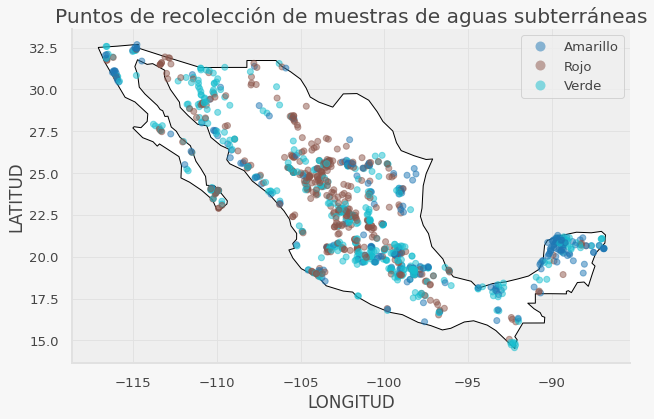

In [32]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
#mapa
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, alpha = 0.5,column='SEMAFORO',legend=True)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Puntos de recolección de muestras de aguas subterráneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [33]:
#Aplicamos k-means sólo para las coordenadas de Latitud y Longitud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [34]:
X=df[['LATITUD','LONGITUD']]
y=df['SEMAFORO']

In [35]:
#Encontrando el número óptimo de clusters
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

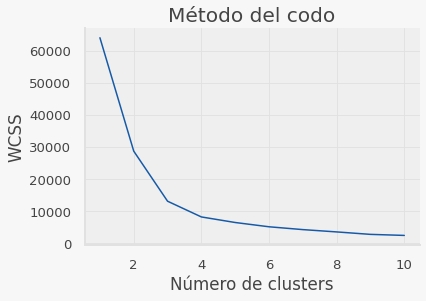

In [36]:
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Presumiblemente con 4 clusters podríamos agrupar las 1,068 observaciones

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [134]:
y_kmeans

array([3, 3, 1, ..., 1, 1, 1], dtype=int32)

In [38]:
cluster=pd.DataFrame(y_kmeans)
cluster

,0
0,3
1,3
2,1
3,3
4,2
...,...
1063,1
1064,1
1065,1
1066,1


In [39]:
cluster['cluster']=pd.DataFrame(y_kmeans)
cluster=cluster.drop([0],axis=1)

In [ ]:
#Juntando Latitud. Longitud y Cluster

In [40]:
result = pd.concat([X, cluster],axis=1)
result

,LATITUD,LONGITUD,cluster
0,22.20887,-102.02210,3
1,21.99958,-102.20075,3
2,22.36685,-102.28801,1
3,22.18435,-102.29449,3
4,23.45138,-110.24480,2
...,...,...,...
1063,24.76036,-99.54191,1
1064,24.78280,-99.70099,1
1065,25.55197,-99.82249,1
1066,24.80118,-100.32683,1


In [41]:
result["Coordinates"] = list(zip(result.LONGITUD, result.LATITUD))
result["Coordinates"] = result["Coordinates"].apply(Point)

In [42]:
gdf2 = gpd.GeoDataFrame(result, geometry="Coordinates")

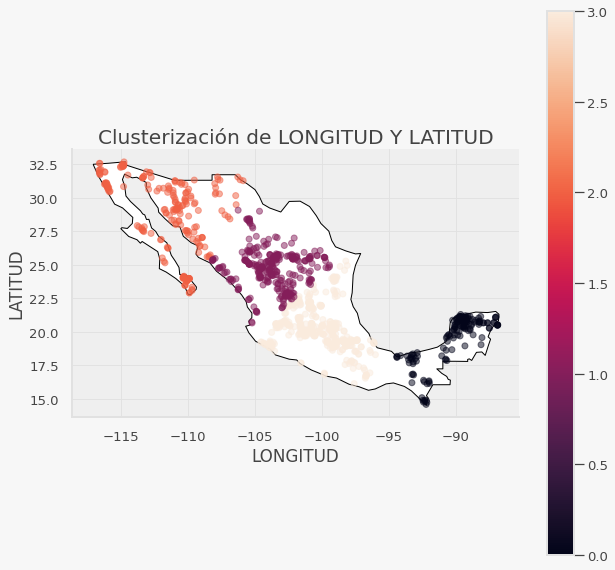

In [43]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

gdf2.plot(ax=gax, alpha = 0.5,column='cluster',legend=True)

gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('Clusterización de LONGITUD Y LATITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

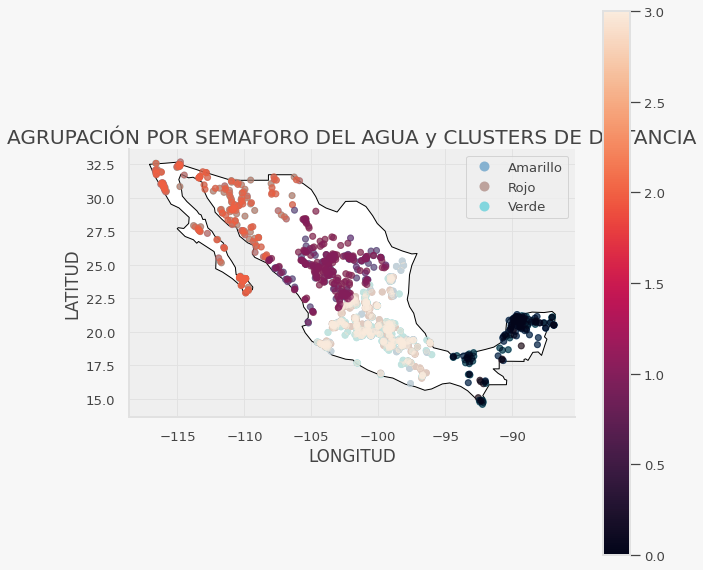

In [44]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')
gdf.plot(ax=gax, alpha = 0.5,column='SEMAFORO',legend=True)
gdf2.plot(ax=gax, alpha = 0.5,column='cluster',legend=True)
gax.set_xlabel('LONGITUD')
gax.set_ylabel('LATITUD')
gax.set_title('AGRUPACIÓN POR SEMAFORO DEL AGUA y CLUSTERS DE DISTANCIA')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [45]:
df.dtypes

CLAVE                     object
SITIO                     object
ORGANISMO_DE_CUENCA       object
ESTADO                    object
MUNICIPIO                 object
ACUIFERO                  object
SUBTIPO                   object
LONGITUD                 float64
LATITUD                  float64
PERIODO                    int64
ALC_mg/L                 float64
CALIDAD_ALC               object
CONDUCT_mS/cm            float64
CALIDAD_CONDUC            object
SDT_M_mg/L               float64
CALIDAD_SDT_salin         object
FLUORUROS_mg/L           float64
CALIDAD_FLUO              object
DUR_mg/L                 float64
CALIDAD_DUR               object
COLI_FEC_NMP/100_mL      float64
CALIDAD_COLI_FEC          object
N_NO3_mg/L               float64
CALIDAD_N_NO3             object
AS_TOT_mg/L              float64
CALIDAD_AS                object
CD_TOT_mg/L              float64
CALIDAD_CD                object
CR_TOT_mg/L              float64
CALIDAD_CR                object
HG_TOT_mg/

In [199]:
y.value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

var_num=['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL','N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L', 'PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

#Imputación de valores missing, para información numérica se utilizará la mediana
#Estandarización de la 
numeric_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
        ]
                      )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, var_num)
                    ],
                    remainder='passthrough'
)

In [51]:
X.dtypes

ALC_mg/L               float64
CONDUCT_mS/cm          float64
SDT_M_mg/L             float64
FLUORUROS_mg/L         float64
DUR_mg/L               float64
COLI_FEC_NMP/100_mL    float64
N_NO3_mg/L             float64
AS_TOT_mg/L            float64
CD_TOT_mg/L            float64
CR_TOT_mg/L            float64
HG_TOT_mg/L            float64
PB_TOT_mg/L            float64
MN_TOT_mg/L            float64
FE_TOT_mg/L            float64
dtype: object

In [52]:
X_prep = preprocessor.fit_transform(X)
y=pd.DataFrame(y)

In [83]:
y_final= y['SEMAFORO'].map({'Verde':1,'Amarillo':2,'Rojo':3})

In [84]:
y_final

0       1
1       1
2       3
3       1
4       3
       ..
1063    3
1064    3
1065    3
1066    1
1067    1
Name: SEMAFORO, Length: 1068, dtype: int64

In [85]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_prep,y_final,random_state = 42)

# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(max_depth=4,random_state= 42)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

Profundidad del árbol: 4
Número de nodos terminales: 8


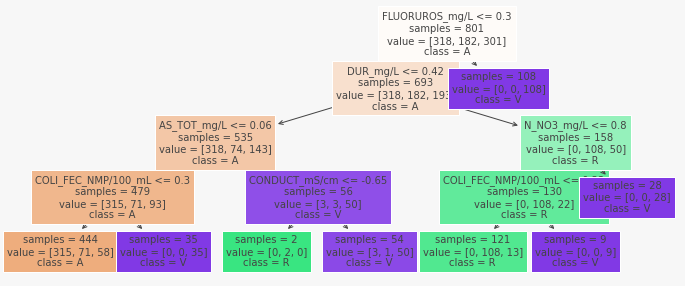

In [88]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = X.columns,
            class_names   = 'ARV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

In [89]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,DUR_mg/L,0.276587
3,FLUORUROS_mg/L,0.259607
5,COLI_FEC_NMP/100_mL,0.191081
7,AS_TOT_mg/L,0.150083
6,N_NO3_mg/L,0.110429
1,CONDUCT_mS/cm,0.012214
0,ALC_mg/L,0.000000
2,SDT_M_mg/L,0.000000
8,CD_TOT_mg/L,0.000000
9,CR_TOT_mg/L,0.000000


In [90]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.673189067498315


In [92]:
#Random forest
from sklearn.ensemble import RandomForestRegressor

#Usamos los mismos grupos que anteriormente dividimos
# Creación del modelo
modelo2 = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'mse',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

In [93]:
modelo2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


RandomForestRegressor(criterion='mse', n_estimators=10, n_jobs=-1,
                      random_state=123)

In [94]:
# Error de test del modelo inicial
# ==============================================================================
predicciones = modelo2.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.2603656317033503


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion '

Valor óptimo de n_estimators: 136


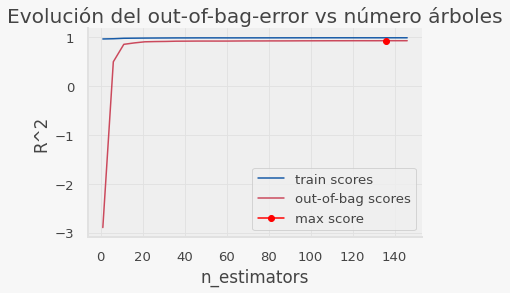

In [97]:
#Optimización de parámetros
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo3 = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo3.fit(X_train, y_train)
    train_scores.append(modelo3.score(X_train, y_train))
    oob_scores.append(modelo3.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

Valor óptimo de n_estimators: 51


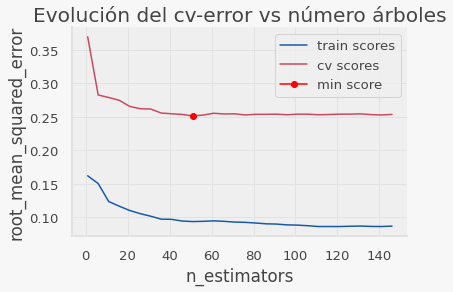

In [104]:
from sklearn.model_selection import cross_val_score
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo4 = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo4.fit(X_train, y_train)
    predicciones = modelo4.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo4,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [105]:
#Importancia de los predictores
importancia_predictores = pd.DataFrame(
                            {'predictor': X.columns,
                             'importancia': modelo4.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,FLUORUROS_mg/L,0.289398
7,AS_TOT_mg/L,0.175407
6,N_NO3_mg/L,0.138395
5,COLI_FEC_NMP/100_mL,0.132187
4,DUR_mg/L,0.073230
13,FE_TOT_mg/L,0.056717
12,MN_TOT_mg/L,0.029937
1,CONDUCT_mS/cm,0.027771
11,PB_TOT_mg/L,0.024798
9,CR_TOT_mg/L,0.023034
